In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lamborghini-sales-2020-2025/lamborghini_sales_2020_2025.csv


In [92]:
path = '/kaggle/input/lamborghini-sales-2020-2025/lamborghini_sales_2020_2025.csv'
df = pd.read_csv(path)

conn = sqlite3.connect('/kaggle/working/lamborghini.db')
df.to_sql('lamborghini', conn, if_exists='replace', index=False)
cur = conn.cursor()

df = df.rename(columns={'Base Price (USD)':'price'})
df.head()




,Model,Year,Region,Color,Fuel Type,price,Horsepower,Sales Volume,Turbo (Yes/No)
0,Urus,2020,EMEA,Black,Gasoline,230000,641,4500,Yes
1,Urus,2020,Americas,White,Gasoline,240000,641,4800,Yes
2,Urus,2020,APAC,Red,Gasoline,235000,641,2700,Yes
3,Huracán,2020,EMEA,Yellow,Gasoline,260000,631,2500,Yes
4,Huracán,2020,Americas,Orange,Gasoline,270000,631,2600,Yes


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           54 non-null     object
 1   Year            54 non-null     int64 
 2   Region          54 non-null     object
 3   Color           54 non-null     object
 4   Fuel Type       54 non-null     object
 5   price           54 non-null     int64 
 6   Horsepower      54 non-null     int64 
 7   Sales Volume    54 non-null     int64 
 8   Turbo (Yes/No)  54 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.9+ KB


In [94]:
cur.execute('SELECT Model,SUM("Sales Volume") AS total_sales FROM lamborghini GROUP BY 1 ORDER BY 2 DESC LIMIT 5').fetchall()


[('Urus', 54305),
 ('Huracán', 41481),
 ('Urus SE', 26812),
 ('Revuelto', 8956),
 ('Aventador', 5970)]

In [95]:
cur.execute('SELECT Year,SUM("Sales Volume") as total_sales FROM lamborghini GROUP BY 1 ORDER BY 1').fetchall()


[(2020, 20250),
 (2021, 21925),
 (2022, 24243),
 (2023, 25838),
 (2024, 27918),
 (2025, 21200)]

In [90]:
cur.execute('SELECT Color,SUM("Sales Volume") as total_sales FROM lamborghini GROUP BY 1 ORDER BY 2 DESC').fetchall()


[('Black', 44900),
 ('White', 28943),
 ('Orange', 17700),
 ('Yellow', 15761),
 ('Red', 15093),
 ('Silver', 13571),
 ('Blue', 3206),
 ('Grey', 1300),
 ('Green', 900)]

In [91]:
cur.execute('SELECT "Turbo (Yes/No)",SUM("Sales Volume") as total_sales FROM lamborghini GROUP BY 1').fetchall()

[('Yes', 141374)]

In [97]:
top_models = df.groupby('Model')['Sales Volume'].sum().sort_values(ascending=False).head(5)
top_models


Model
Urus         54305
Huracán      41481
Urus SE      26812
Revuelto      8956
Aventador     5970
Name: Sales Volume, dtype: int64

In [96]:
yearly_sales = df.groupby('Year')['Sales Volume'].sum().head(5)
yearly_sales

Year
2020    20250
2021    21925
2022    24243
2023    25838
2024    27918
Name: Sales Volume, dtype: int64

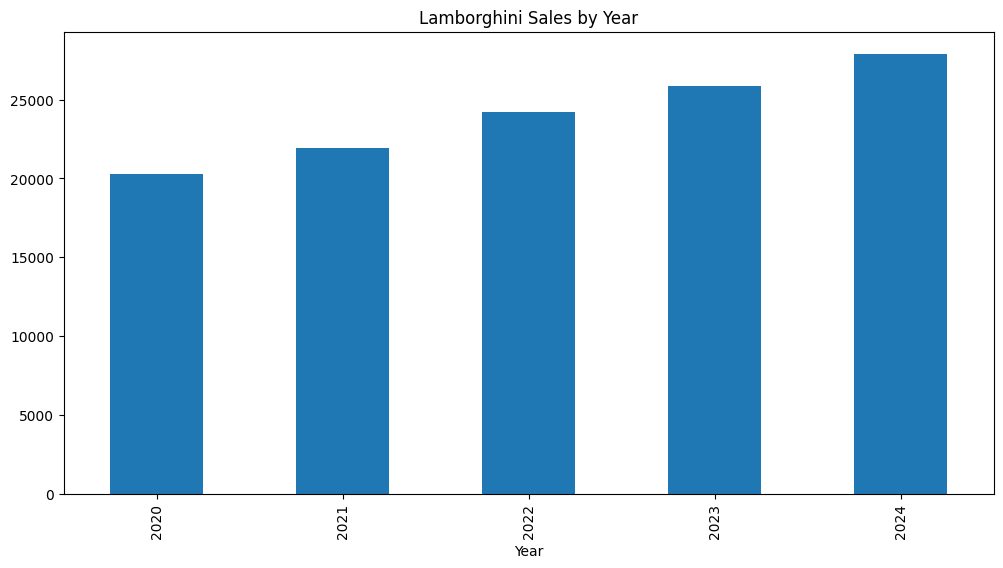

In [87]:
yearly_sales.plot(kind='bar',figsize=(12,6))
plt.title('Lamborghini Sales by Year')
plt.show()

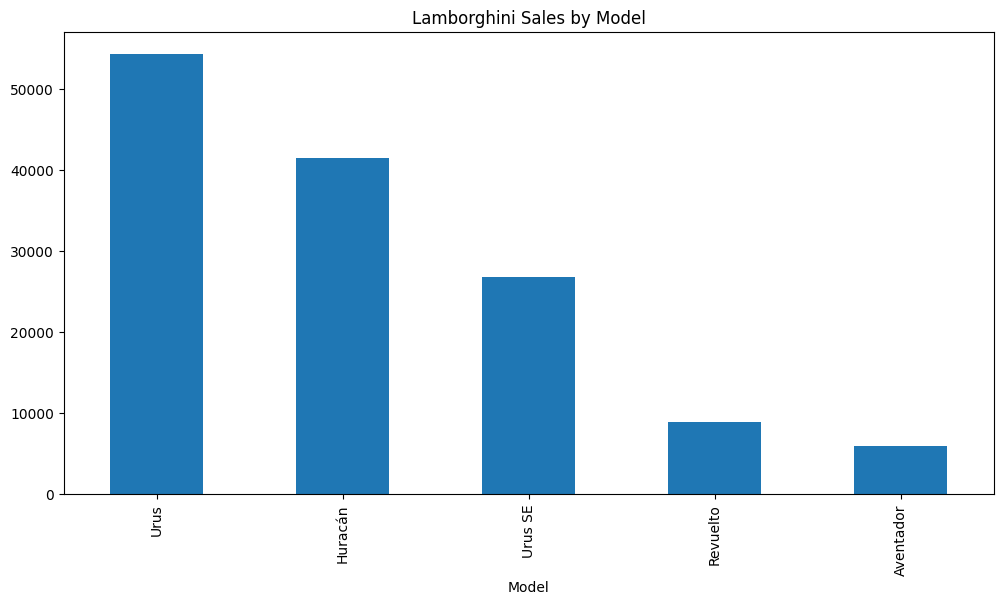

In [99]:
top_models.plot(kind='bar',figsize=(12,6))
plt.title('Lamborghini Sales by Model')
plt.show()